In [2]:
import collections

def bfs(graph, root):
    visited, queue = set(), collections.deque([root])
    visited.add(root)
    while queue:
        vertex = queue.popleft()
        print(vertex)
        for neighbour in graph[vertex]:
            if neighbour not in visited:
                visited.add(neighbour)
                queue.append(neighbour)

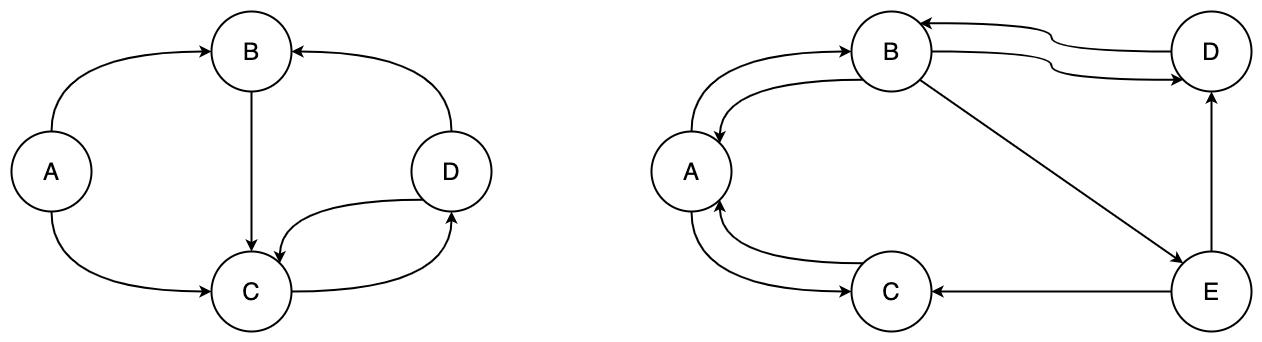

In [4]:
graph1 = {'A': ['B', 'C'], 'B': ['C'], 'C': ['D'], 'D': ['B', 'C']}
graph2 = {'A': ['B', 'C'], 'B': ['A', 'D', 'E'], 'C': ['A'], 'D': ['B'], 'E': ['C', 'D']}

In [87]:
print('BFS - graph1:')
bfs(graph1, 'A')
print('BFS - graph2:')
bfs(graph2, 'A')

BFS - graph1:
A
B
C
D
BFS - graph2:
A
B
C
D
E


In [88]:
print('BFS - graph1:')
bfs(graph1, 'D')
print('BFS - graph2:')
bfs(graph2, 'D')

BFS - graph1:
D
B
C
BFS - graph2:
D
B
A
E
C


In [89]:
import collections

def dfs(graph, root):
    visited, stack = set(), collections.deque([root])
    visited.add(root)
    while stack:
        vertex = stack.pop()
        print(vertex)
        for neighbour in reversed(graph[vertex]):
            if neighbour not in visited:
                visited.add(neighbour)
                stack.append(neighbour)

In [90]:
print('DFS - graph1:')
dfs(graph1, 'A')
print('DFS - graph2:')
dfs(graph2, 'A')

DFS - graph1:
A
B
C
D
DFS - graph2:
A
B
D
E
C


In [93]:
graph3 = {'Arad': ['Zerind', 'Sibiu', 'Timisoara'],
         'Zerind': ['Arad', 'Oradea'],
         'Oradea': ['Zerind', 'Sibiu'],
         'Sibiu': ['Arad', 'Oradea', 'Fagaras', 'Rimnicu Vilcea'],
         'Timisoara': ['Arad', 'Lugoj'],
         'Lugoj': ['Timisoara', 'Mehadia'],
         'Mehadia': ['Lugoj', 'Drobeta'],
         'Drobeta': ['Mehadia', 'Craiova'],
         'Craiova': ['Drobeta', 'Rimnicu Vilcea', 'Pitesti'],
         'Rimnicu Vilcea': ['Sibiu', 'Craiova', 'Pitesti'],
         'Fagaras': ['Sibiu', 'Bucharest'],
         'Pitesti': ['Rimnicu Vilcea', 'Craiova', 'Bucharest'],
         'Bucharest': ['Fagaras', 'Pitesti', 'Giurgiu', 'Urziceni'],
         'Giurgiu': ['Bucharest'],
         'Urziceni': ['Bucharest', 'Vaslui', 'Hirsova'],
         'Hirsova': ['Urziceni', 'Eforie'],
         'Eforie': ['Hirsova'],
         'Vaslui': ['Urziceni', 'Iasi'],
         'Iasi': ['Vaslui', 'Neamt'],
         'Neamt': ['Iasi']
         }

In [94]:
print('BFS:')
bfs(graph3, 'Arad')

BFS:
Arad
Zerind
Sibiu
Timisoara
Oradea
Fagaras
Rimnicu Vilcea
Lugoj
Bucharest
Craiova
Pitesti
Mehadia
Giurgiu
Urziceni
Drobeta
Vaslui
Hirsova
Iasi
Eforie
Neamt


In [95]:
print('DFS:')
dfs(graph3, 'Arad')

DFS:
Arad
Zerind
Oradea
Sibiu
Fagaras
Bucharest
Pitesti
Craiova
Drobeta
Mehadia
Lugoj
Giurgiu
Urziceni
Vaslui
Iasi
Neamt
Hirsova
Eforie
Rimnicu Vilcea
Timisoara


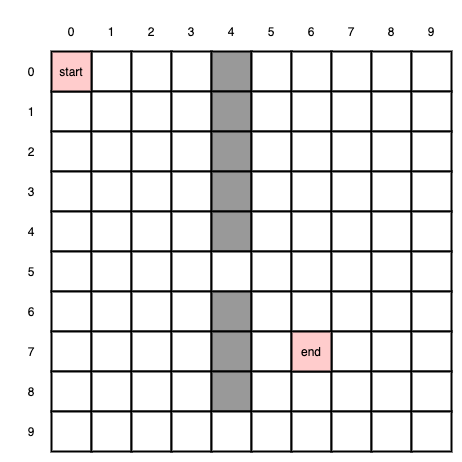


In [77]:
maze = [[0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
start = (0, 0)
end = (7, 6)

In [79]:
class Node():
    def __init__(self, parent=None, position=None):
        self.parent = parent
        self.position = position

        self.g = 0
        self.h = 0
        self.f = 0

    def __eq__(self, other):
        return self.position == other.position

def astar(maze, start, end, heuristic):
    start_node = Node(None, start)
    start_node.g = start_node.h = start_node.f = 0
    end_node = Node(None, end)
    end_node.g = end_node.h = end_node.f = 0
    open_list = []
    closed_list = []

    open_list.append(start_node)
    iterations = 0
    while len(open_list) > 0:
        iterations += 1
        current_node = open_list[0]
        current_index = 0
        for index, item in enumerate(open_list):
            if item.f < current_node.f:
                current_node = item
                current_index = index
        open_list.pop(current_index)
        closed_list.append(current_node)

        if current_node == end_node:
            path = []
            current = current_node
            while current is not None:
                path.append(current.position)
                current = current.parent
            return path[::-1], iterations

        children = []

        for new_position in [(0, -1), (0, 1), (-1, 0), (1, 0)]:
            node_position = (current_node.position[0] + new_position[0], current_node.position[1] + new_position[1])
            if node_position[0] > (len(maze) - 1) or node_position[0] < 0 or node_position[1] > (len(maze[len(maze)-1]) -1) or node_position[1] < 0:
                continue
            if maze[node_position[0]][node_position[1]] != 0:
                continue
            new_node = Node(current_node, node_position)
            children.append(new_node)

        for child in children:
            is_in_closed = False
            for closed_child in closed_list:
                if child == closed_child:
                    is_in_closed = True
                    break
            if is_in_closed:
                continue

            child.g = current_node.g + 1
            child.h = heuristic(child.position[0], child.position[1], end_node.position[0], end_node.position[1])
            child.f = child.g + child.h

            is_in_open = False
            for open_node in open_list:
                if child == open_node and child.g > open_node.g:
                    is_in_open = True
                    break
            if is_in_open:
                continue

            open_list.append(child)

In [82]:
def f_heuristic(x1, y1, x2, y2):
    return x1-x2 + y1-y2

In [83]:
path = astar(maze, start, end, f_heuristic)
print(path)

([(0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (2, 3), (3, 3), (4, 3), (5, 3), (5, 4), (5, 5), (5, 6), (6, 6), (7, 6)], 3132)


In [84]:
import math

def h_euclidean(x1, y1, x2, y2):
  return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

In [85]:
path = astar(maze, start, end, h_euclidean)
print(path)

([(0, 0), (1, 0), (1, 1), (2, 1), (2, 2), (3, 2), (3, 3), (4, 3), (5, 3), (5, 4), (5, 5), (6, 5), (6, 6), (7, 6)], 878)


In [48]:
def h_manhattan(x1, y1, x2, y2):
  return abs(x2 - x1) + abs(y2 - y1)

In [86]:
print(astar(maze, start, end, h_euclidean))

([(0, 0), (1, 0), (1, 1), (2, 1), (2, 2), (3, 2), (3, 3), (4, 3), (5, 3), (5, 4), (5, 5), (6, 5), (6, 6), (7, 6)], 878)


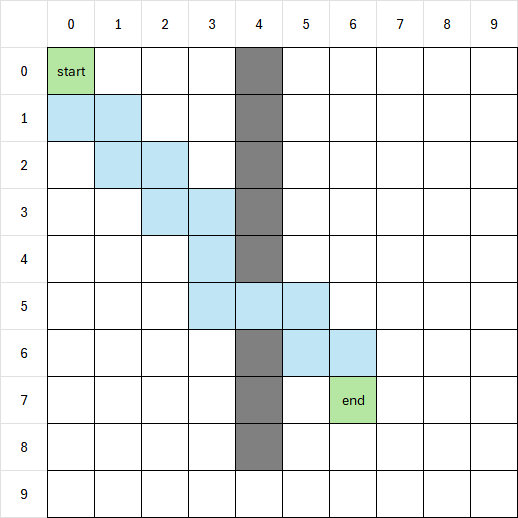

In [57]:
print(astar(maze, start, end, h_manhattan))

([(0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (2, 3), (3, 3), (4, 3), (5, 3), (5, 4), (5, 5), (5, 6), (6, 6), (7, 6)], 887)


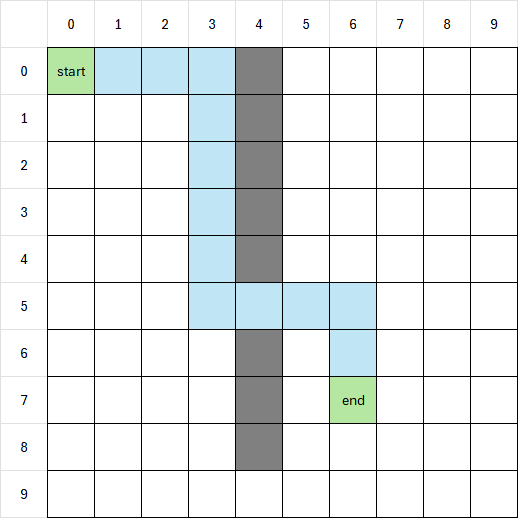